점수 차이를 1점부터 6점 사이로 조정한 딕셔너리를 아래에 작성했습니다. 쉬운 장르는 낮은 점수(1점), 어려운 장르는 높은 점수(6점)를 가지도록 수정했습니다.

설명
쉬운 장르 (1~2점)

1점: Animation, Comedy, Family
단순한 문장과 쉬운 주제를 가진 장르.
2점: Music, Romance, TV Movie
다소 복잡한 감정 표현이 포함되지만 비교적 쉬운 대화.
중간 난이도 장르 (3~4점)

3점: Action, Adventure, Fantasy
동작과 모험 중심, 일부 기술적 용어.
4점: Crime, Drama, Horror, Mystery, Thriller, Western
심리적 대화, 갈등, 전문 용어 등이 포함되어 난이도가 중간 수준.
어려운 장르 (5~6점)

5점: Documentary
주제에 따라 전문적이고 어려운 용어 사용.
6점: History, Science Fiction, War
고급 어휘와 기술적/역사적 맥락 이해가 필요.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
level = {
    'A1': 0,
    'A2': 1,
    'B1': 2,
    'B2': 3,
    'C1': 4,
    'C2': 5
}

genre_scores = {
    "Action": 3,
    "Adventure": 3,
    "Animation": 1,
    "Comedy": 1,
    "Crime": 4,
    "Documentary": 5,
    "Drama": 4,
    "Family": 1,
    "Fantasy": 3,
    "History": 6,
    "Horror": 4,
    "Music": 2,
    "Mystery": 4,
    "Romance": 2,
    "Science Fiction": 6,
    "TV Movie": 2,
    "Thriller": 4,
    "War": 6,
    "Western": 4
}

In [28]:
data = pd.read_csv('movie_with_level.csv', encoding='utf-8')
df = pd.DataFrame(data)

In [29]:
def calculate_difficulty(row):
    genres = row['genres'].split(', ')  # 장르 리스트
    temp = level[row['predicted_level']]   # 기존  레벨
    # 장르별 점수를 가져오고 조화평균 계산
    scores = [genre_scores[genre] for genre in genres if genre in genre_scores]
    genre_score = sum(scores) / len(scores) if scores else 0
    # 난이도는 장르 점수와 기존 점수를 조합
    return genre_score + (temp/5)

# apply로 함수 적용
df['study_level'] = df.apply(calculate_difficulty, axis=1)

KeyError: 'predicted_level'

In [ ]:
print(df)

      Unnamed: 0                     title  tmdbid   rank release_date  \
0              0                      Coco  354912  8.210   2017-10-27   
1              9              Interstellar  157336  8.442   2014-11-05   
2             13                       xXx    7451  5.900   2002-08-09   
3             14               Scary Movie    4247  6.400   2000-07-07   
4             15                  Coraline   14836  7.900   2009-02-05   
...          ...                       ...     ...    ...          ...   
1855       16088             The Burrowers   15846  5.900   2008-09-09   
1856       16116    I Think I Love My Wife   14434  5.400   2007-03-07   
1857       16356          The Jolson Story   31206  6.700   1946-10-10   
1858       16414        Hider in the House   56669  5.900   1989-05-13   
1859       16524  The Fast and the Furious    9799  6.983   2001-06-22   

      runtime                                            summary  \
0         105  Despite his family’s bafflin

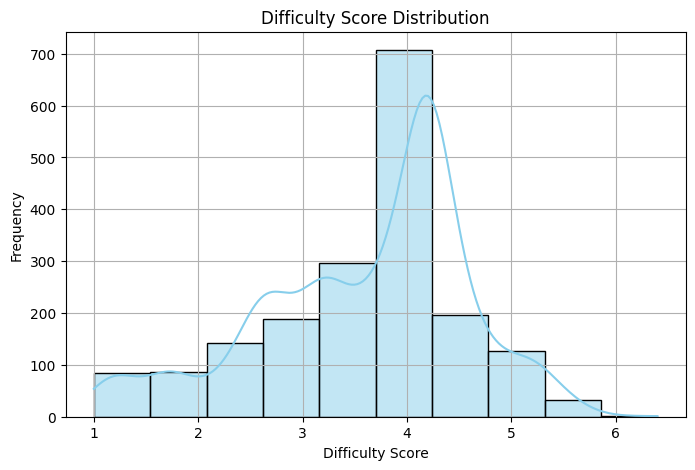

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['study_level'], bins=10, kde=True, color='skyblue')
plt.title('Difficulty Score Distribution')
plt.xlabel('Difficulty Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

0~1 A1
1~2 A2
2~3 B1
3~4 B2
4~5 C1
5~6 C2

In [ ]:
def assign_level(score):
    if score < 1:
        return "A1"
    elif 1 <= score < 2:
        return "A2"
    elif 2 <= score < 3:
        return "B1"
    elif 3 <= score < 4:
        return "B2"
    elif 4 <= score < 5:
        return "C1"
    else:
        return "C2"

In [ ]:
# apply로 난이도 레벨 열 추가
df['difficulty_level'] = df['study_level'].apply(assign_level)

print(df)

      Unnamed: 0                     title  tmdbid   rank release_date  \
0              0                      Coco  354912  8.210   2017-10-27   
1              9              Interstellar  157336  8.442   2014-11-05   
2             13                       xXx    7451  5.900   2002-08-09   
3             14               Scary Movie    4247  6.400   2000-07-07   
4             15                  Coraline   14836  7.900   2009-02-05   
...          ...                       ...     ...    ...          ...   
1855       16088             The Burrowers   15846  5.900   2008-09-09   
1856       16116    I Think I Love My Wife   14434  5.400   2007-03-07   
1857       16356          The Jolson Story   31206  6.700   1946-10-10   
1858       16414        Hider in the House   56669  5.900   1989-05-13   
1859       16524  The Fast and the Furious    9799  6.983   2001-06-22   

      runtime                                            summary  \
0         105  Despite his family’s bafflin

In [ ]:
# 새로운 열이 추가된 df를 csv 파일로 추출
df.drop(columns=['predicted_level','study_level'], inplace=True)
df.to_csv('movie_data.csv', encoding='utf-8')

In [33]:
data = pd.read_csv('movie_with_level.csv', encoding='utf-8')
df = pd.DataFrame(data)
# 열 이름 변경
df.rename(columns={'difficulty_level': 'study_level'}, inplace=True)
df.to_csv('movie_data.csv', encoding='utf-8')

In [31]:
# 난이도 레벨 분포 시각화
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='difficulty_level', palette='pastel', order=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.title('Distribution of Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


ValueError: Could not interpret value `difficulty_level` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>